{'a': 1.0, 'b': 0.5555555555555556, 'c': 0.625, 'd': 0.625, 'e': 0.625, 'f': 0.625}
{'a': 1.0, 'b': 0.5555555555555556, 'c': 0.625, 'd': 0.625, 'e': 0.625, 'f': 0.625}


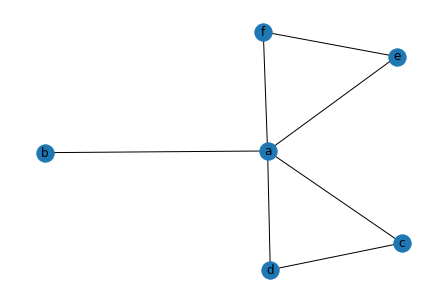

In [148]:
import networkx as nx
from collections import defaultdict
import sys

#Test
g = nx.Graph()
g2 = nx.complete_graph(5)

g.add_nodes_from([
   "a","b","c","d","e", "f"
])

g.add_edges_from([
    ("a","b"),("a", "c"),("a","d"),("a", "e"),("a", "f"),
    ("d", "c"),("e", "f")
])
#Test



def degree_centrality(g: nx.Graph) -> dict:
    """This function returns degree centrality of all nodes in the graph provided
    :param g:
    :return dict of the degree centrality of each node:
    """
    degree_centrality = dict()
    for node in g.nodes:
        degree_centrality[node] = get_neighbors(g)[node]/(len(nx.nodes(g))-1)
    return degree_centrality



def betweeness_centrality(g: nx.Graph) -> dict:
    """
    This function returns the betweeness centrality of nodes in a given graph
    :param g:
    :return dict of nodes with their betweeness values:
    """
    betweeness = dict()
    denominator = ((len(g.nodes) -1) * (len(g.nodes)-2))/2
    for i in g.nodes:
        sum =0
        for j in get_all_paths(g):
            if i in j:
                if j.index(i) != 0 and i != j[-1]:
                    sum +=1
        betweeness[i] = sum/denominator
    return betweeness

def closeness_centrality(g: nx.Graph) -> dict:
    """
    This function returns the closeness centrality of nodes in a given graph
    :param g:
    :return dict of nodes and their centralities:
    """
    closeness = dict()
    numerator = len(g.nodes)-1
    for i in g.nodes:
        sum = 0
        for j in g.nodes:
            if i == j:
                continue
            sum += len(nx.shortest_path(g, i, j))-1
        closeness[i] = numerator/sum
    return closeness

# Helper Functions
def get_neighbors_num(g: nx.Graph) -> dict:
    """
    This function returns #neighbors of all nodes in the graph provided
    :param g:
    :return dict of the number of neighbors of each node:
    """
    num_neighbors = dict()
    for i in g.nodes:
        temp = 0
        for j in g.nodes:
            if g.has_edge(i, j):
                temp +=1
        num_neighbors[i] = temp
    return num_neighbors

def get_neighbors(g: nx.Graph)-> list:
    """
    This function returns neighbors of all nodes in the graph provided
    :param g:
    :return dict of the neighbors of each node:
    """
    neighbors = list()
    for i in g.nodes:
        for j in g.nodes:
            if g.has_edge(i, j):
                neighbors.append ((i, j))
    return neighbors
%matplotlib inline
nx.draw(g, with_labels=True)

def get_all_paths(g: nx.Graph)-> list:
    """
    this function returns all the possible paths in a given graph
    :param g:
    :return list that contains a list of the paths:
    """
    paths = list()
    for i in g.nodes:
        for j in g.nodes:
            if i == j:
                continue
            for path in nx.all_simple_paths(g, i, j):
                if path == nx.shortest_path(g, i, j):
                    if sorted(path) not in paths:
                        paths.append(path)
    for i in paths:
        for j in paths:
            if i == j:
                continue
            if sorted(i) == sorted(j):
                paths.remove(j)
                break
    return paths




# :TODO Prepare Test Cases